In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [13]:
messi = '../../image4labs/messi.jpg'

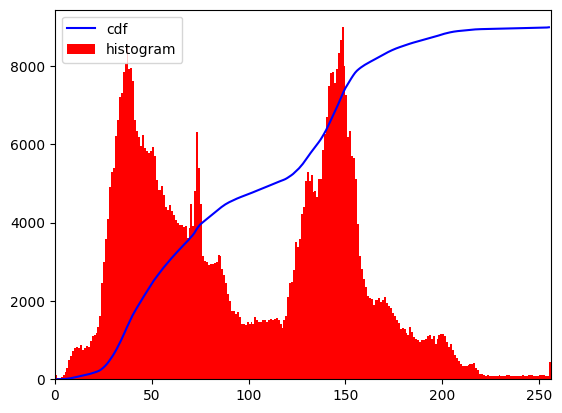

In [14]:
img = cv.imread(messi, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='b')
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

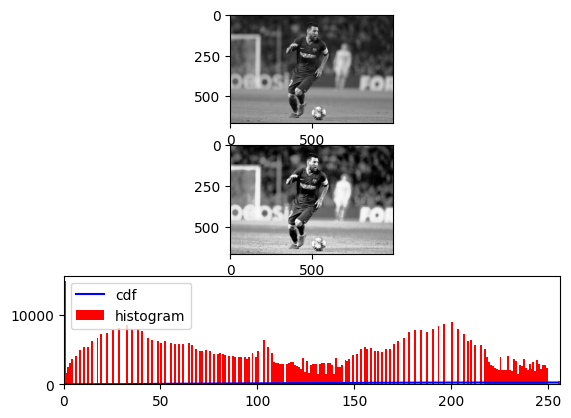

In [20]:
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

img2 = cdf[img]

plt.subplot(311), plt.imshow(img, 'gray')
plt.subplot(312), plt.imshow(img2, 'gray')
plt.subplot(313)
plt.plot(cdf, color='b')
plt.hist(img2.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc='upper left')
plt.show()

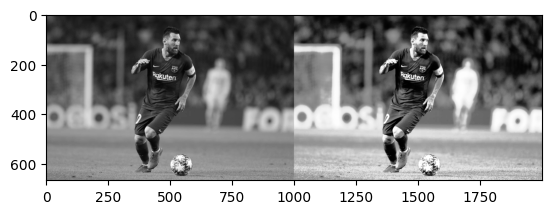

In [ ]:
equ = cv.equalizeHist(img)
res = np.hstack((img, equ))  # stacking images side-by-side
plt.imshow(res, 'grey')

CLAHE (адаптивное выравнивание гистограммы с ограничением контрастности)


При этом изображение делится на небольшие блоки, называемые «плитками» (по умолчанию в OpenCV размер плитки составляет 8x8). Затем каждый из этих блоков выравнивается гистограммой, как обычно. Таким образом, в небольшой области гистограмма будет ограничиваться небольшой областью (если только нет шума). Если шум есть, он будет усилен. Чтобы избежать этого, применяется ограничение контрастности


(674, 894)


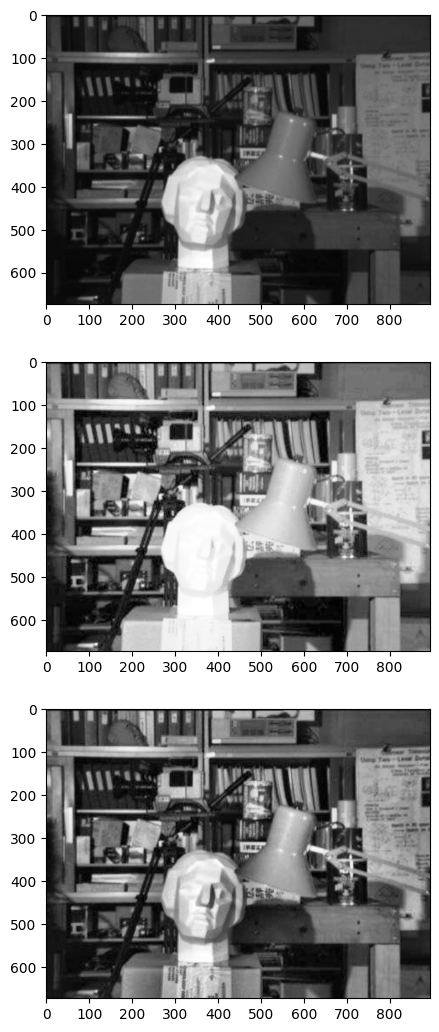

In [ ]:
img = cv.imread(
    '../../image4labs/state.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# create a CLAHE object (Arguments are optional).
equ = cv.equalizeHist(img)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)
print(img.shape)
plt.figure(figsize=(img.shape[0]/70, img.shape[1]/70))
plt.subplot(311), plt.imshow(img, 'gray')
plt.subplot(312), plt.imshow(equ, 'gray')
plt.subplot(313), plt.imshow(cl1, 'gray')
plt.show()